In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from shapely.geometry import Point, Polygon
import geopandas as gpd

In [2]:
from matplotlib.colors import LinearSegmentedColormap

In [17]:
df = pd.read_csv('../data/mag/rent_afford_2br_all.csv')

In [18]:
df.columns

Index(['geoid', 'puma', 'SF_MedRent_2Bed', 'MF_MedRent_2Bed', 'SF_CanAff',
       'SF_CantAff', 'SF_CanAff_pct', 'SF_CantAff_pct', 'MF_CanAff',
       'MF_CantAff', 'MF_CanAff_pct', 'MF_CantAff_pct'],
      dtype='object')

In [19]:
df = df.dropna()
df['geoid'] = df.geoid.astype(int)

## map percent that can/can't by neighborhood

In [5]:
# allow max rows and colums to be displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
geo = gpd.read_file('../data/geo/shapefiles/PUMAS.geojson')
#geo.head(2)

In [7]:
phx = gpd.read_file('../data/geo/shapefiles/phx.geojson')
villages = gpd.read_file('../data/geo/shapefiles/Villages.shp')
villages = villages.to_crs(4269)
road = gpd.read_file('../data/geo/shapefiles/maricopa_primroads.geojson')
road = road.to_crs(4269)
mask = gpd.read_file('../data/geo/shapefiles/PUMAS_mask.geojson')

### join data to geo files

In [23]:
df = pd.merge(geo,df,how='left',left_on='joinid',right_on='geoid')

In [24]:
df.head(2)

,STATEFP20,PUMACE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,joinid,geometry,geoid,puma,SF_MedRent_2Bed,MF_MedRent_2Bed,SF_CanAff,SF_CantAff,SF_CanAff_pct,SF_CantAff_pct,MF_CanAff,MF_CantAff,MF_CanAff_pct,MF_CantAff_pct
0,04,00129,0400129,Phoenix (Far North) & Peoria (Northwest) Citie...,G6120,S,654040399,3894959,+33.8457815,-112.1641828,400129,"MULTIPOLYGON (((-112.04763 33.71469, -112.0475...",400129,Phoenix (Far North) & Peoria (Northwest) Citie...,1725.0,1760.0,63722.0,178508.0,0.26,0.74,65413.0,176817.0,0.27,0.73
1,04,00112,0400112,"Maricopa County--Scottsdale (North), Phoenix (...",G6120,S,608391353,434248,+33.7670066,-111.9328706,400112,"MULTIPOLYGON (((-111.78744 33.68347, -111.7874...",400112,"Maricopa County--Scottsdale (North), Phoenix (...",2350.0,2398.0,34351.0,207879.0,0.14,0.86,35602.0,206628.0,0.15,0.85


In [25]:
df.describe()

,ALAND20,AWATER20,joinid,geoid,SF_MedRent_2Bed,MF_MedRent_2Bed,SF_CanAff,SF_CantAff,SF_CanAff_pct,SF_CantAff_pct,MF_CanAff,MF_CantAff,MF_CanAff_pct,MF_CantAff_pct
count,1.500000e+01,1.500000e+01,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,1.500315e+08,4.751324e+05,400119.466667,400119.466667,1508.766667,1507.800000,82824.133333,159405.866667,0.342000,0.658000,82802.800000,159427.200000,0.341333,0.658667
std,1.990223e+08,9.764382e+05,5.235411,5.235411,310.683800,328.245596,21863.474789,21863.474789,0.089459,0.089459,20732.982299,20732.982299,0.084080,0.084080
min,3.348861e+07,2.684700e+04,400112.000000,400112.000000,1195.000000,1106.000000,34351.000000,124774.000000,0.140000,0.520000,35602.000000,135469.000000,0.150000,0.560000
25%,5.061796e+07,7.029600e+04,400115.500000,400115.500000,1256.250000,1294.500000,69681.000000,145281.500000,0.290000,0.600000,70104.500000,140612.500000,0.290000,0.585000
50%,7.508780e+07,1.879480e+05,400119.000000,400119.000000,1450.000000,1465.000000,82398.000000,159832.000000,0.340000,0.660000,85800.000000,156430.000000,0.350000,0.650000
75%,1.181456e+08,3.115855e+05,400122.500000,400122.500000,1656.250000,1652.000000,96948.500000,172549.000000,0.400000,0.710000,101617.500000,172125.500000,0.415000,0.710000
max,6.540404e+08,3.894959e+06,400129.000000,400129.000000,2350.000000,2398.000000,117456.000000,207879.000000,0.480000,0.860000,106761.000000,206628.000000,0.440000,0.850000


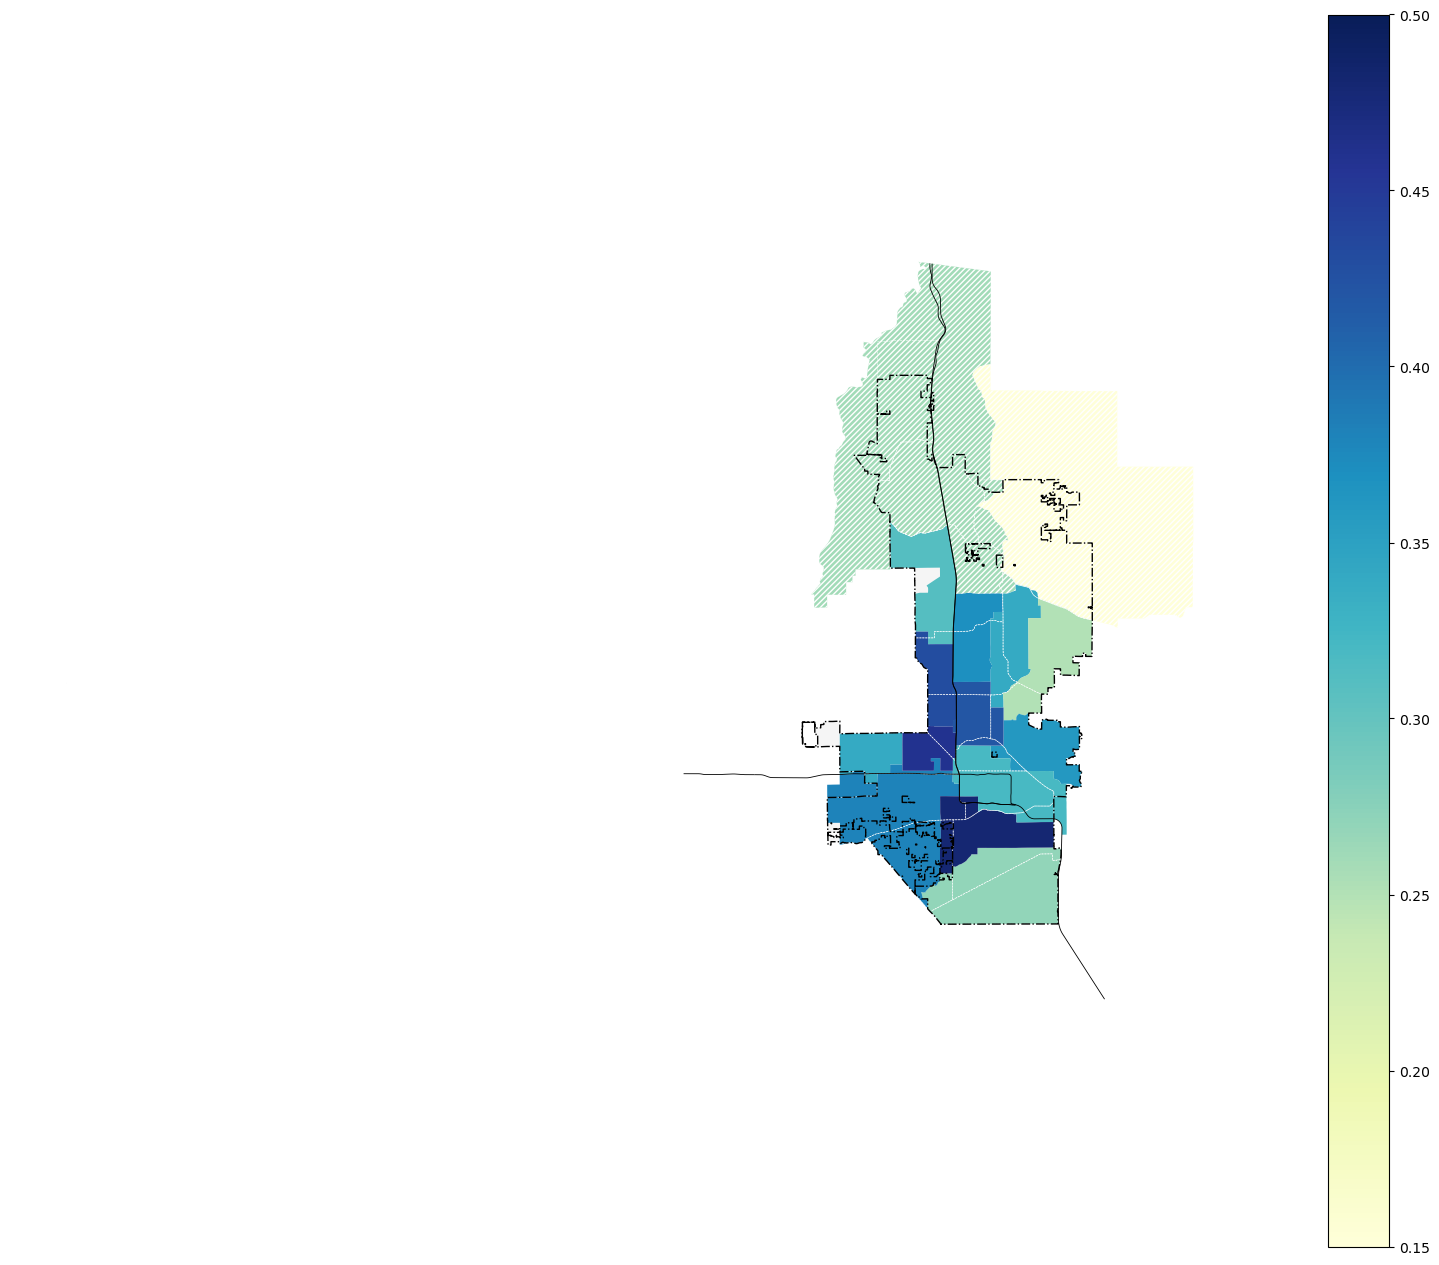

In [28]:
# percent can afford single family
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.15,vmax=0.5)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'SF_CanAff_pct', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig('img/can_rent_SF_ylgnbu_50pct.jpg', dpi = 300) # saving each plot

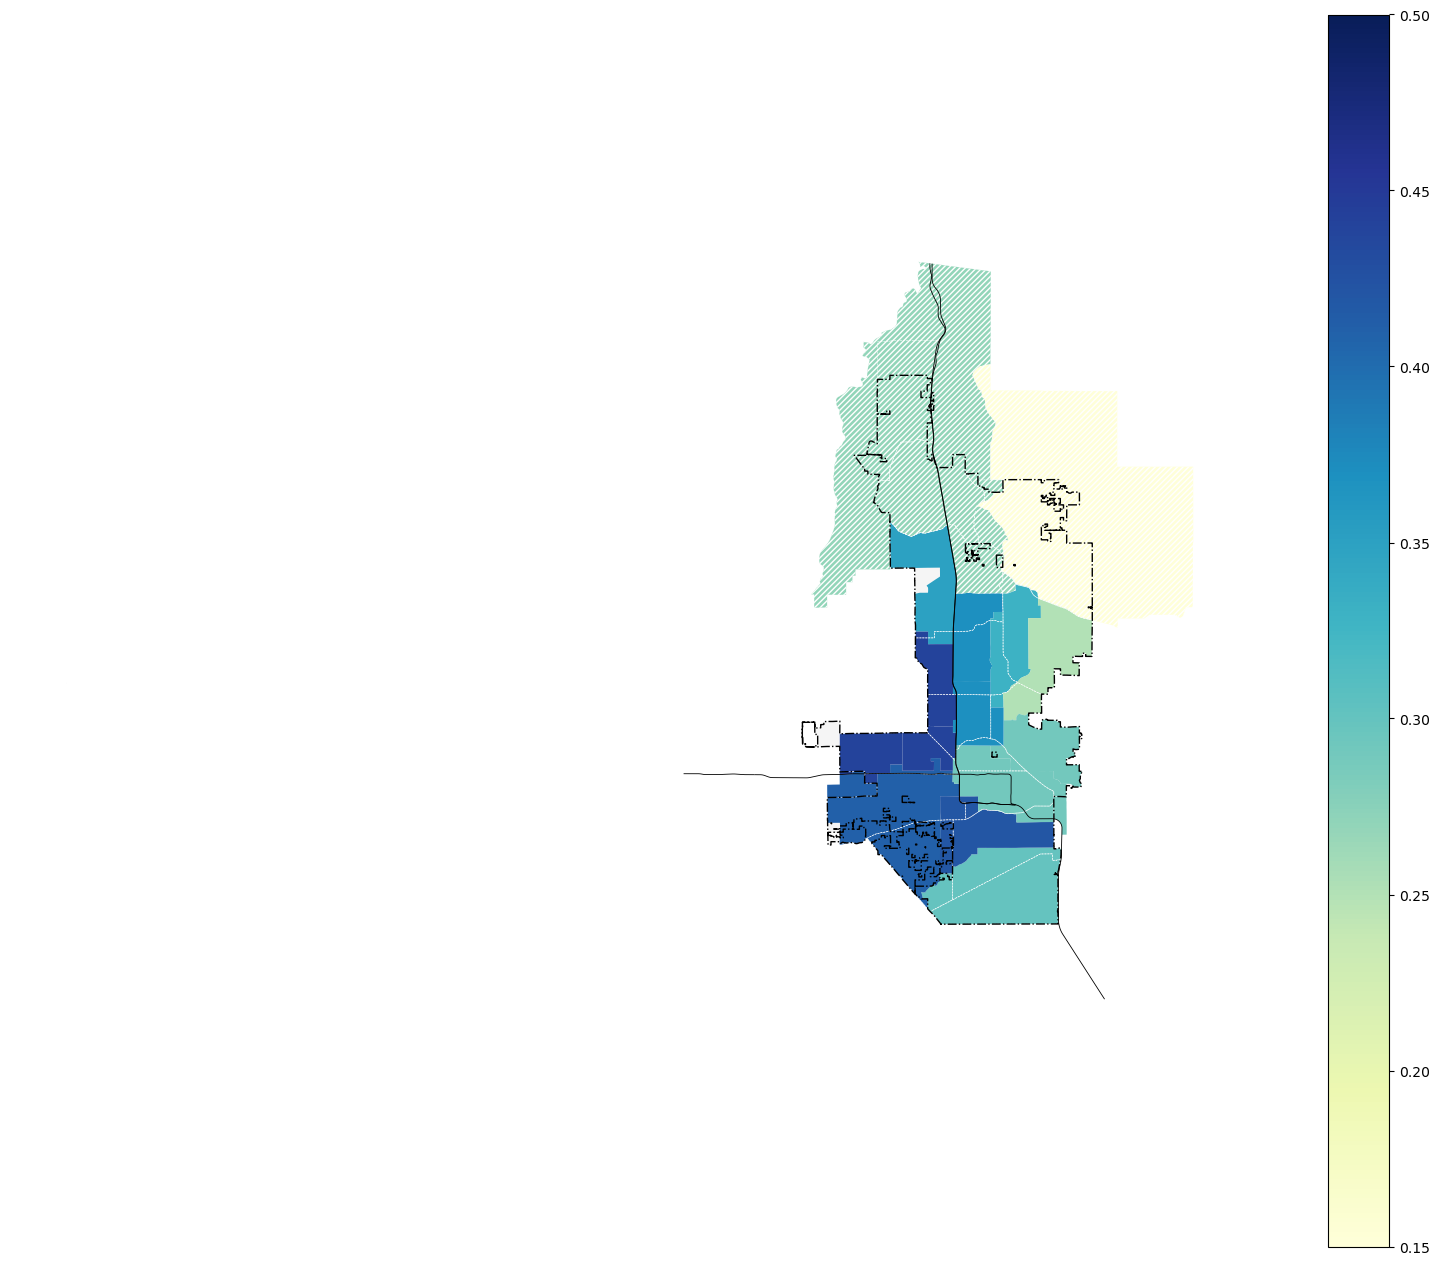

In [30]:
# percent can buy
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=0.15,vmax=.5)
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'MF_CanAff_pct', cmap='YlGnBu', norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/can_rent_MF_ylgnbu_50pct.jpg', dpi = 300) # saving each plot

## median sales value

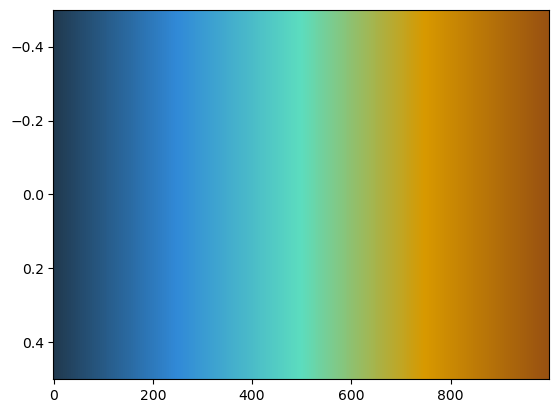

In [31]:
## setting custom color gradient
blue_green_orange = LinearSegmentedColormap.from_list('blue_green_orange', (
    # Edit this gradient at https://eltos.github.io/gradient/#blue_gr_or=213A4F-318AD8-5CDDBF-D89900-995111
    (0.000, (0.129, 0.227, 0.310)),
    (0.250, (0.192, 0.541, 0.847)),
    (0.500, (0.361, 0.867, 0.749)),
    (0.750, (0.847, 0.600, 0.000)),
    (1.000, (0.600, 0.318, 0.067))))


if __name__ == '__main__':
    import numpy as np
    from matplotlib import pyplot as plt
    
    plt.imshow([np.arange(1000)], aspect="auto", cmap=blue_green_orange)
    plt.show()

blue_yl_red =LinearSegmentedColormap.from_list('blue_ylw_red', (
    # Edit this gradient at https://eltos.github.io/gradient/#blue_ylw_red=334A5E-3680C1-D2DA03-D86400-C84800
    (0.000, (0.200, 0.290, 0.369)),
    (0.250, (0.212, 0.502, 0.757)),
    (0.500, (0.824, 0.855, 0.012)),
    (0.750, (0.847, 0.392, 0.000)),
    (1.000, (0.784, 0.282, 0.000))))

blue_or = LinearSegmentedColormap.from_list('blue_or', (
    # Edit this gradient at https://eltos.github.io/gradient/#blue_or=273948-3680C1-BE9ECF-D87300-995111
    (0.000, (0.153, 0.224, 0.282)),
    (0.250, (0.212, 0.502, 0.757)),
    (0.500, (0.745, 0.620, 0.812)),
    (0.750, (0.847, 0.451, 0.000)),
    (1.000, (0.600, 0.318, 0.067))))

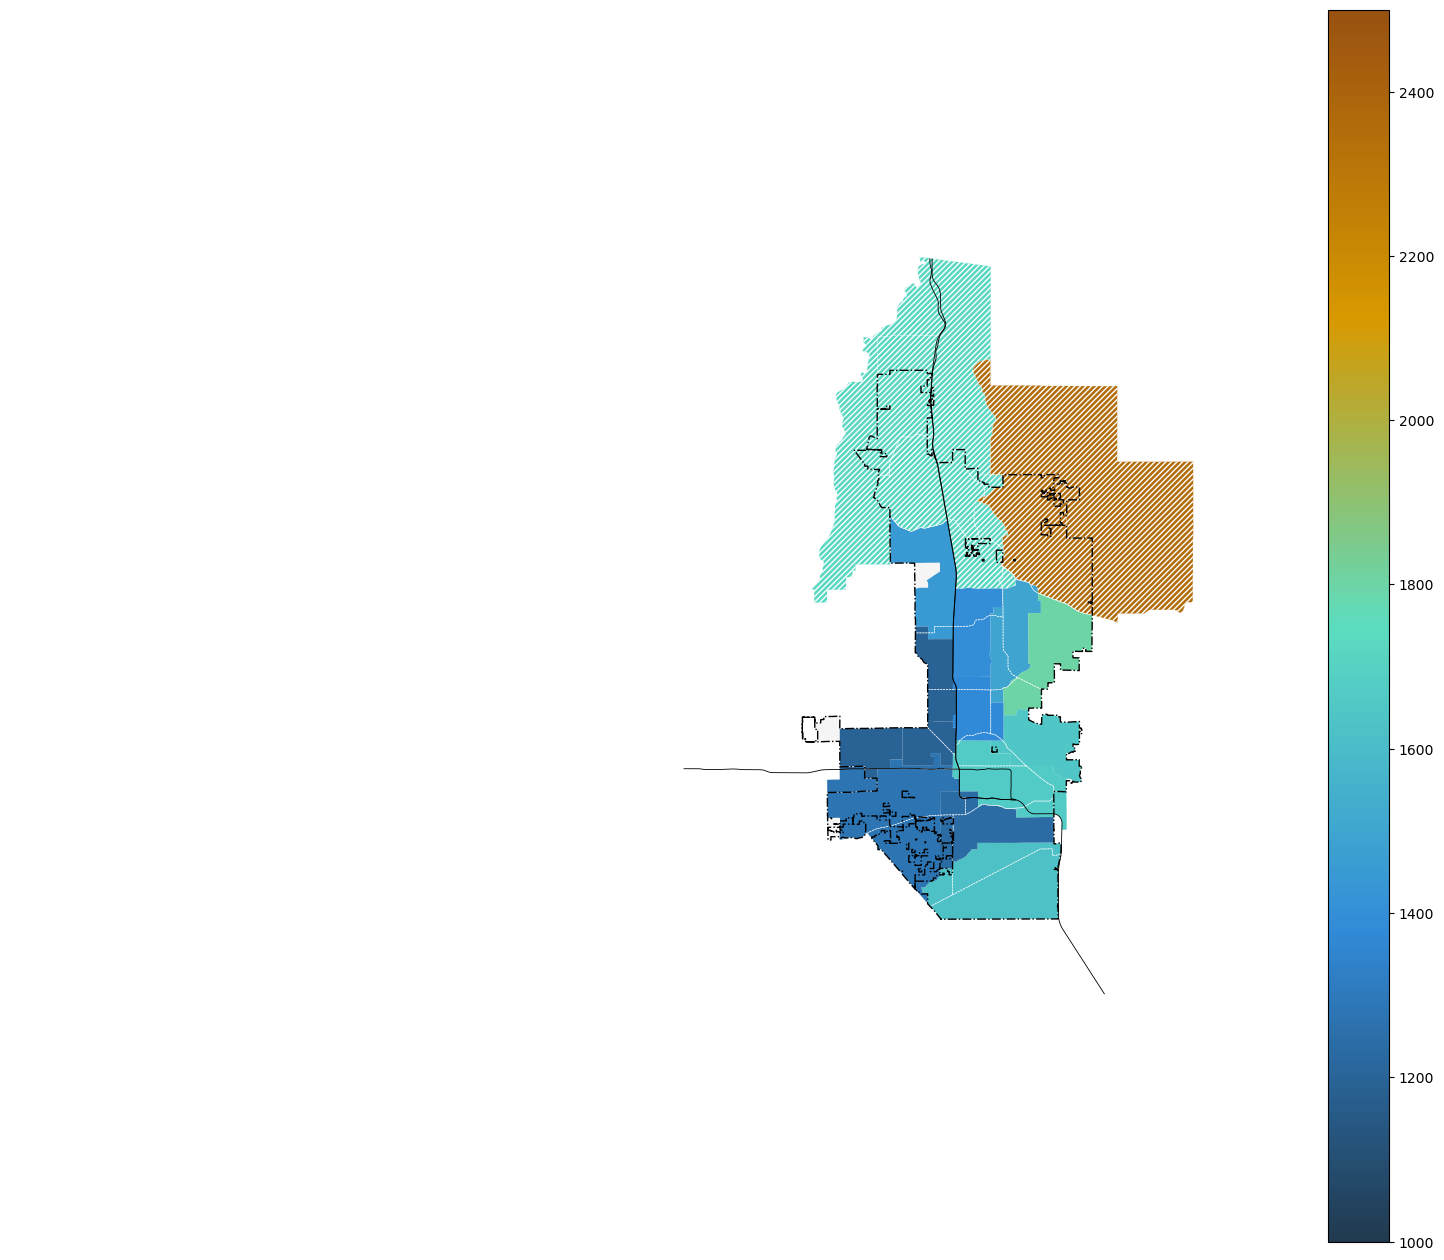

In [33]:
# percent can buy
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap=blue_green_orange, norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'SF_MedRent_2Bed', cmap=blue_green_orange, norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/sf_med_rent.jpg', dpi = 300) # saving each plot

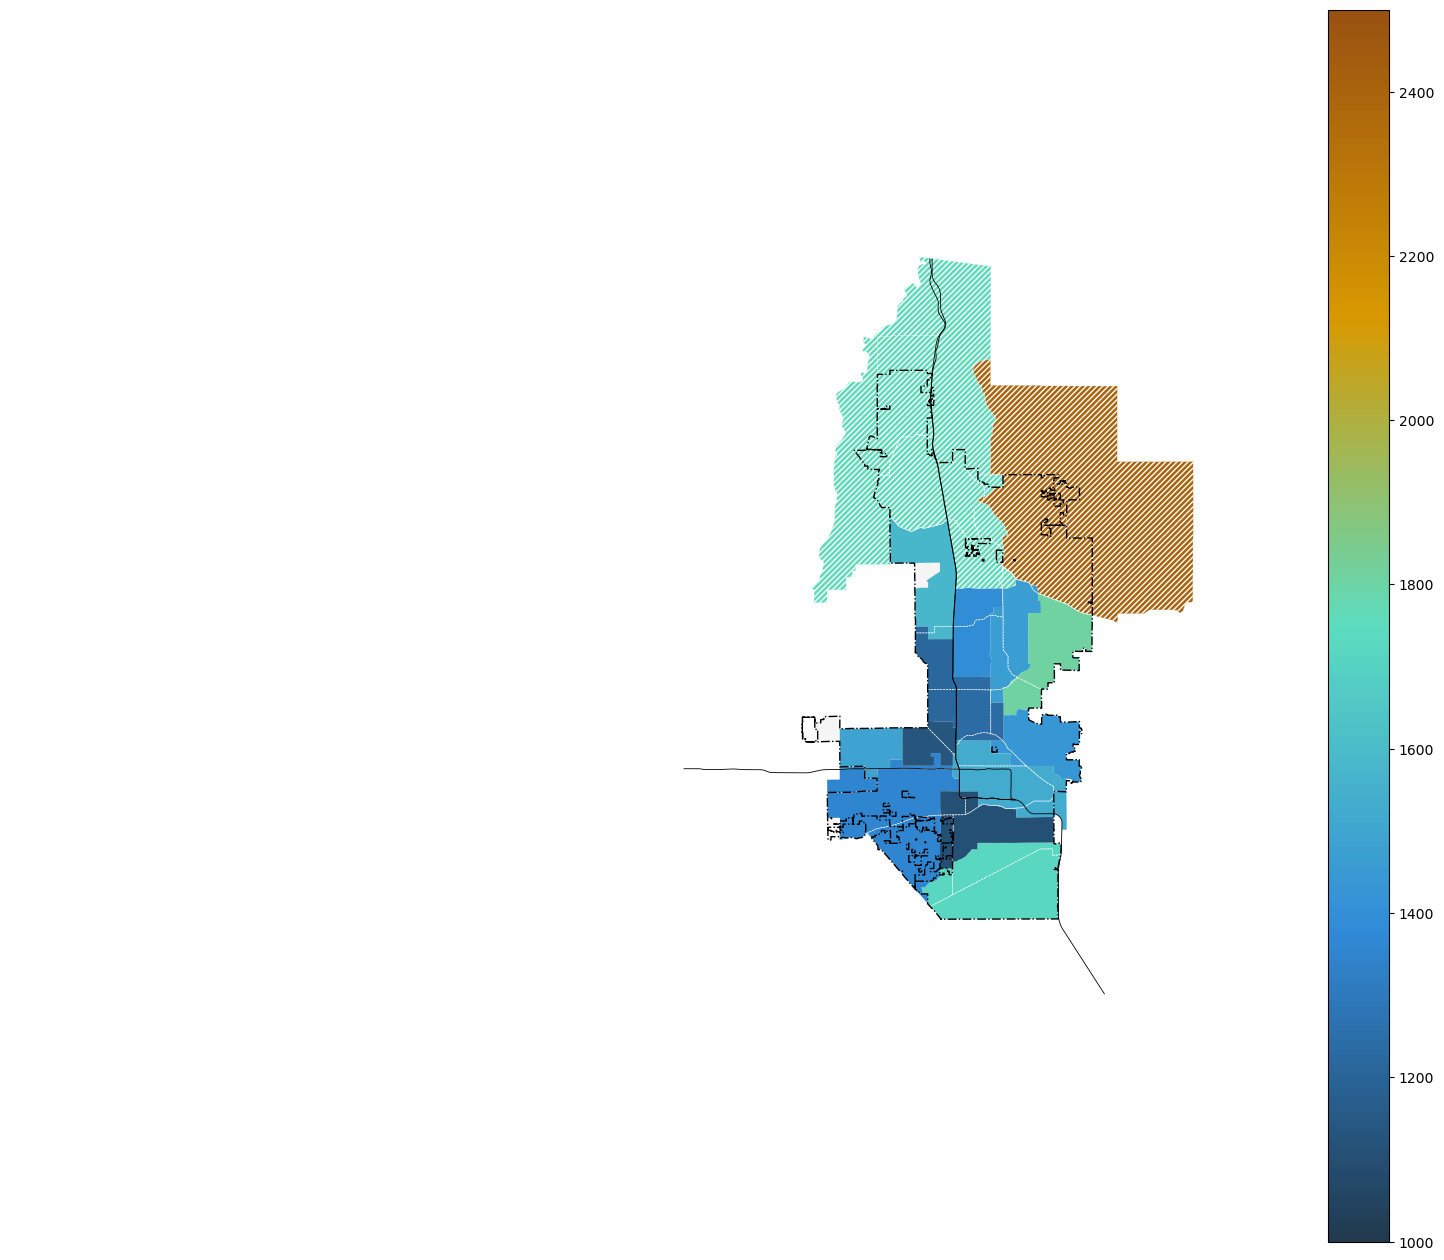

In [34]:
# percent can buy
fig, ax = plt.subplots(1, figsize = (20,16))
ax.axis('off')
new_norm = plt.Normalize(vmin=1000,vmax=2500)
sm = plt.cm.ScalarMappable(cmap=blue_green_orange, norm=new_norm)
sm.set_array([])
phx.plot(ax=ax,color='whitesmoke',edgecolor='black',linewidth=0)
df.plot(column = f'MF_MedRent_2Bed', cmap=blue_green_orange, norm=new_norm, edgecolor="white", linewidth=0.0, ax=ax)
mask.plot(ax=ax,color='none',edgecolor='white',linewidth=0.1,hatch='//////')
villages.plot(ax=ax,color='none',edgecolor='white',linewidth=0.4,linestyle='dashed')
phx.plot(ax=ax,color='none',edgecolor='black',linewidth=1.0,linestyle='dashdot')
road.plot(ax=ax,color='black',edgecolor='black',linewidth=0.6)
fig.colorbar(sm)
plt.savefig(f'img/mf_med_rent.jpg', dpi = 300) # saving each plot